In [2]:
# Установка библиотек с явным указанием совместимых версий (на всякий случай)
!pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 --quiet
!pip install rdkit-pypi==2022.9.5 chembl-webresource-client==0.10.8 --quiet
!pip install matplotlib==3.7.1 seaborn==0.12.2 --quiet
!pip install lightgbm==3.3.5 xgboost==1.7.6 catboost==1.2 --quiet
!pip install optuna==3.3.0 shap==0.42.1 joblib==1.3.2 --quiet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1. Загрузка и анализ данных
Данные успешно загружены из /content/drive/MyDrive/chembl.csv

Загружено данных: (465, 141)
Колонки: ['molecule_chembl_id', 'canonical_smiles', 'pValue', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14', 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_20', 'pca_21', 'pca_22', 'pca_23', 'pca_24', 'pca_25', 'pca_26', 'pca_27', 'pca_28', 'pca_29', 'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36', 'pca_37', 'pca_38', 'pca_39', 'pca_40', 'pca_41', 'pca_42', 'pca_43', 'pca_44', 'pca_45', 'pca_46', 'pca_47', 'pca_48', 'pca_49', 'pca_50', 'pca_51', 'pca_52', 'pca_53', 'pca_54', 'pca_55', 'pca_56', 'pca_57', 'pca_58', 'pca_59', 'pca_60', 'pca_61', 'pca_62', 'pca_63', 'pca_64', 'pca_65', 'pca_66', 'pca_67', 'pca_68', 'pca_69', 'pca_70'

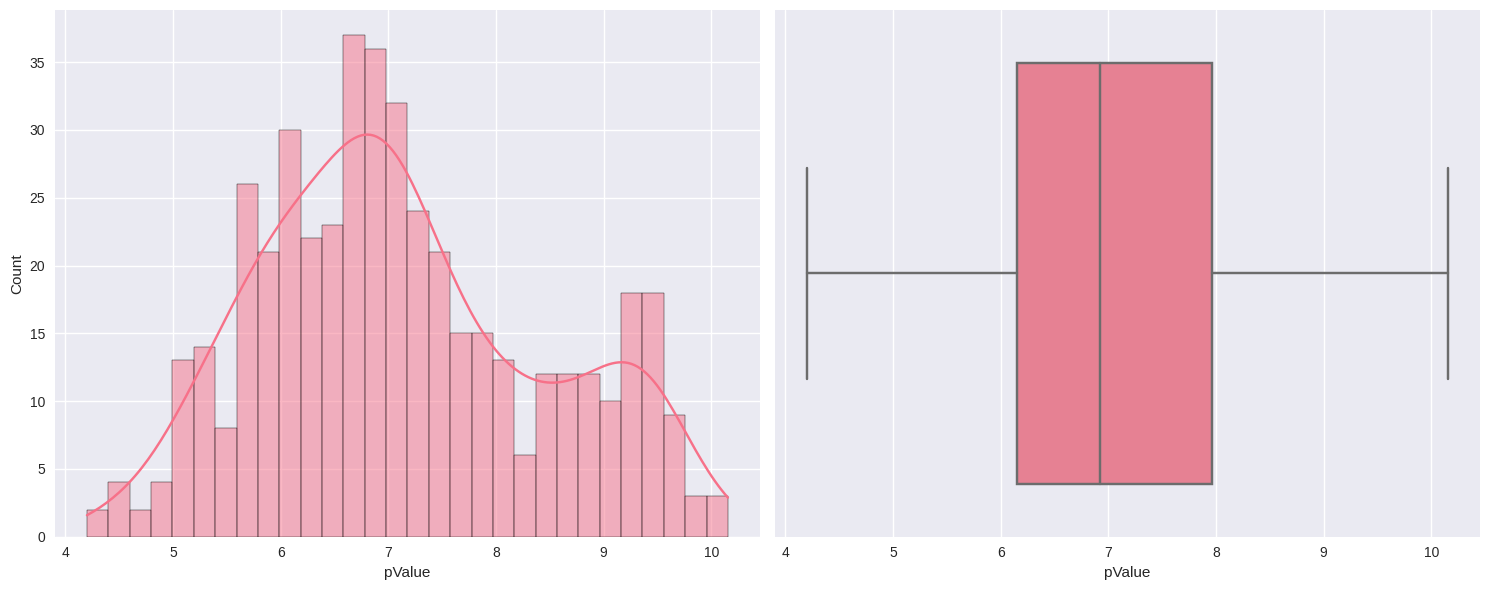


2. Подготовка данных

Размеры данных:
Обучающая выборка: (372, 138)
Тестовая выборка: (93, 138)

После отбора по дисперсии: 138 признаков

PCA не применялся - признаков меньше чем образцов

3. Обучение и оценка моделей

Оценка модели RandomForest...
R²: 0.6205
MAE: 0.6006
MAPE: 8.85%


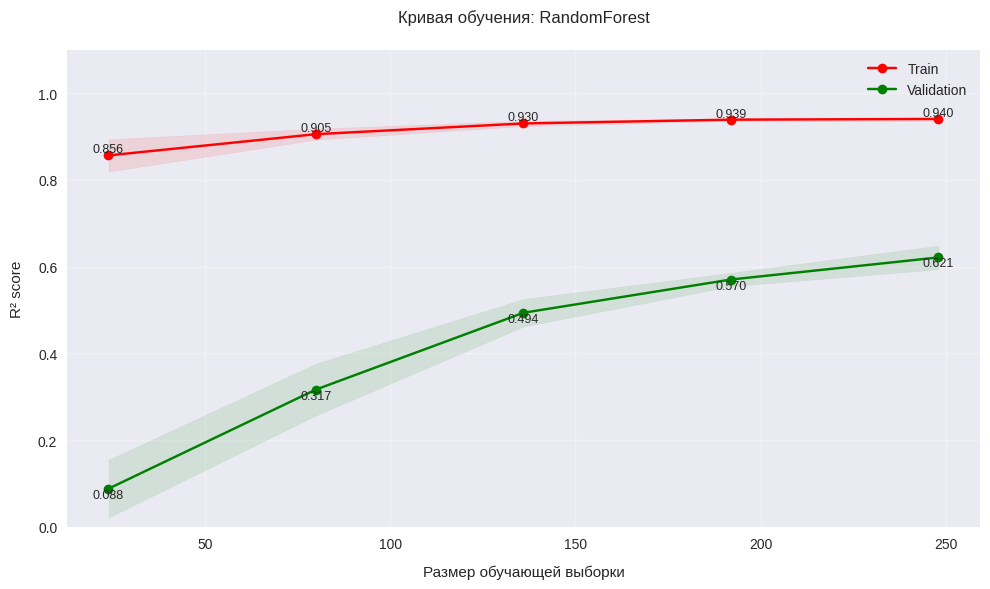


Оценка модели XGBoost...
R²: 0.6227
MAE: 0.6338
MAPE: 9.36%


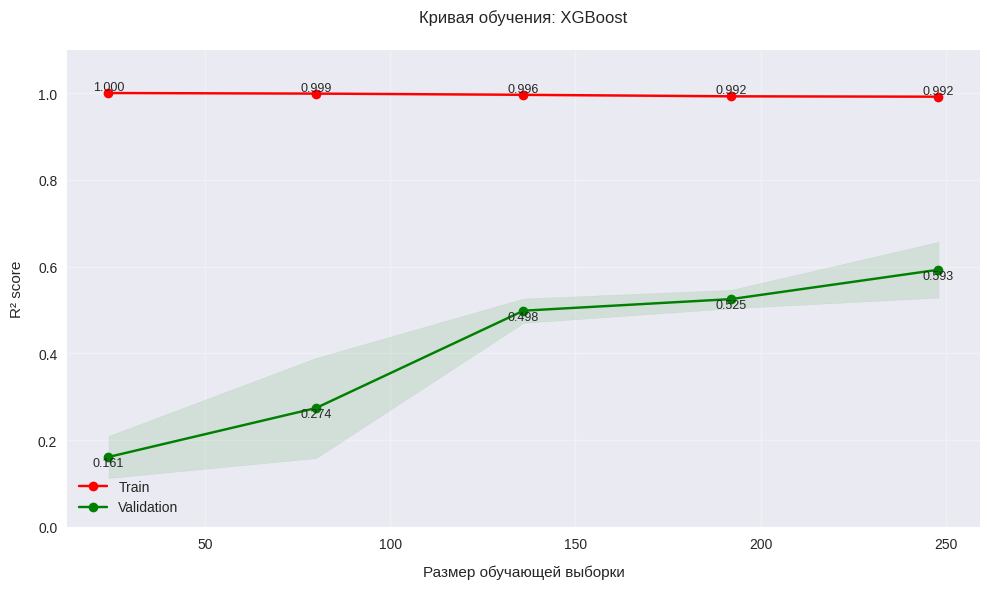


Оценка модели LightGBM...
R²: 0.6451
MAE: 0.5906
MAPE: 8.71%


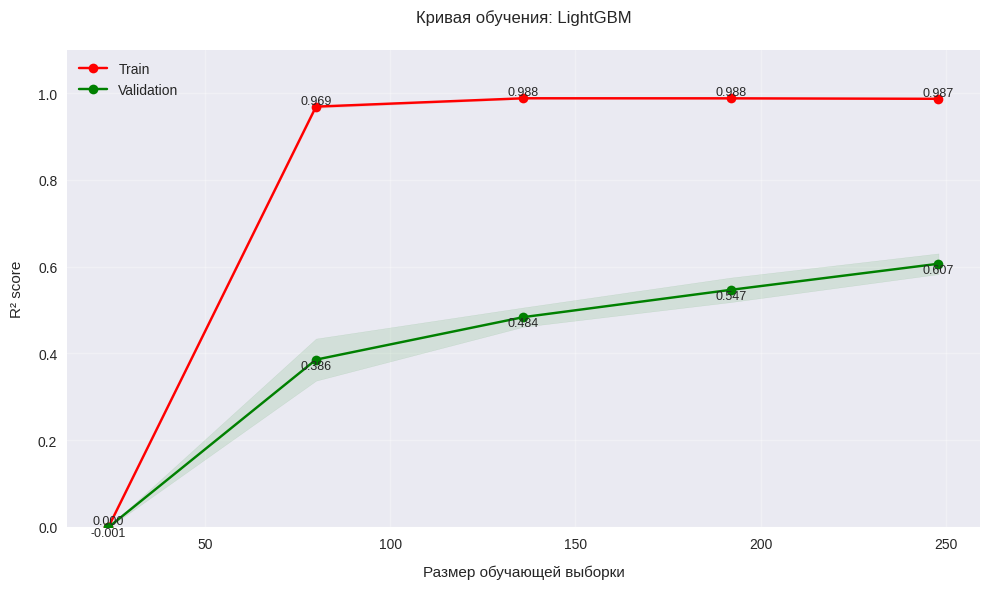


Оценка модели CatBoost...
R²: 0.6105
MAE: 0.6331
MAPE: 9.31%


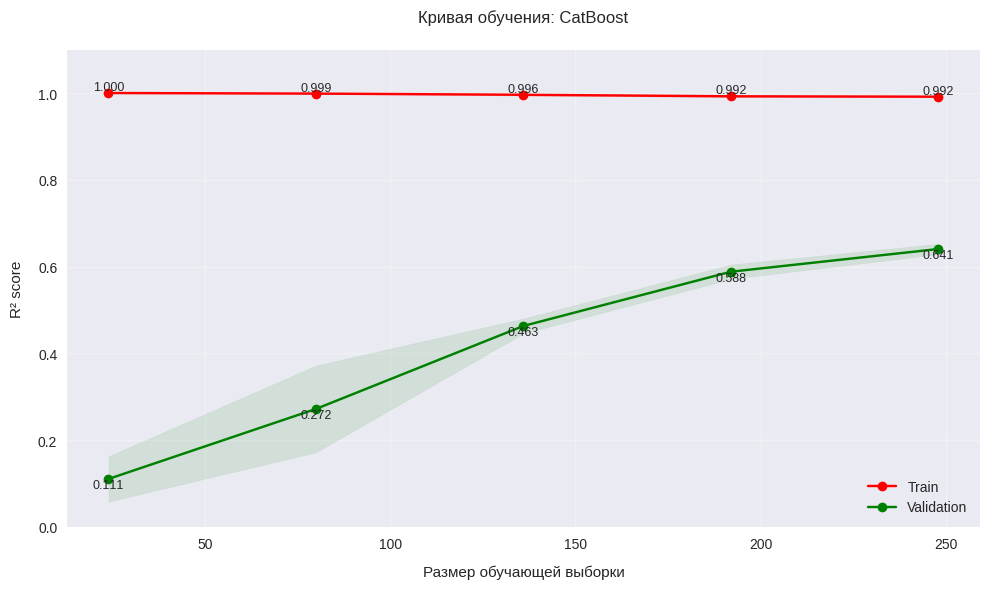


Оценка модели Ridge...
R²: 0.5089
MAE: 0.6802
MAPE: 9.82%


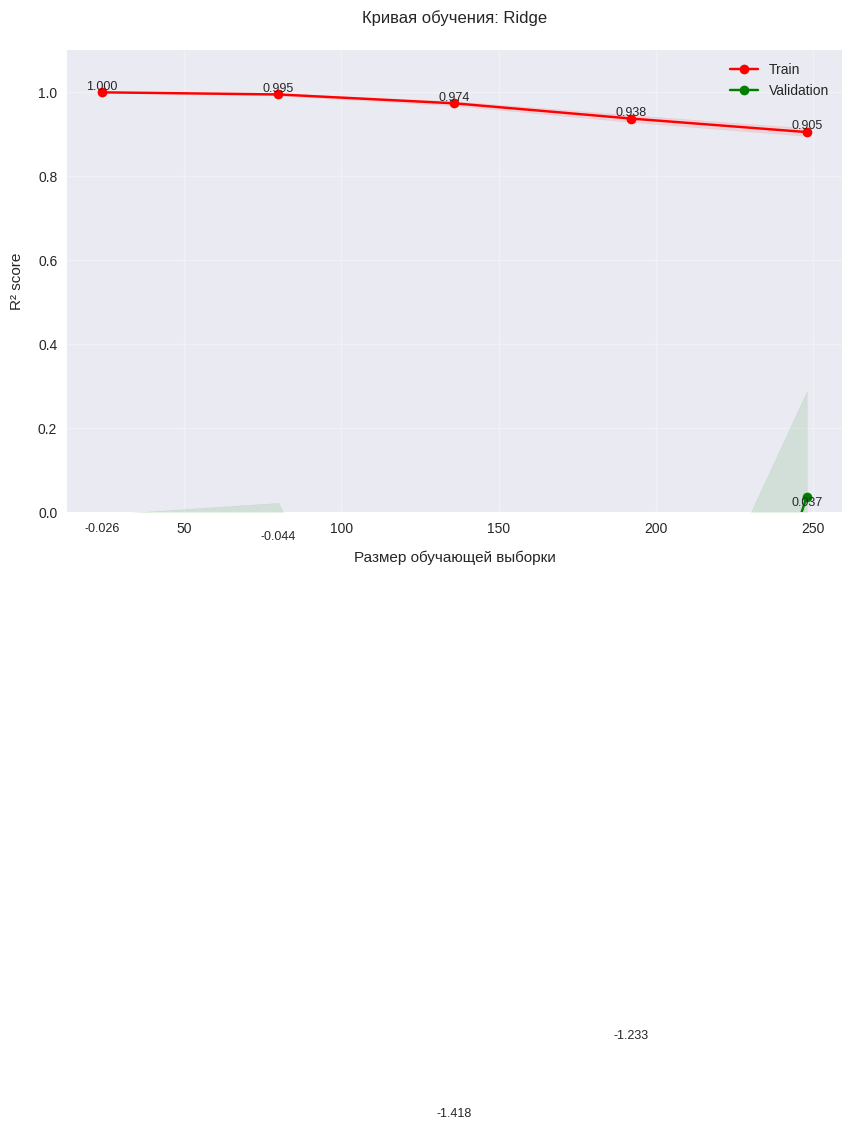


Оценка модели Lasso...
R²: -0.0006
MAE: 1.0877
MAPE: 15.71%


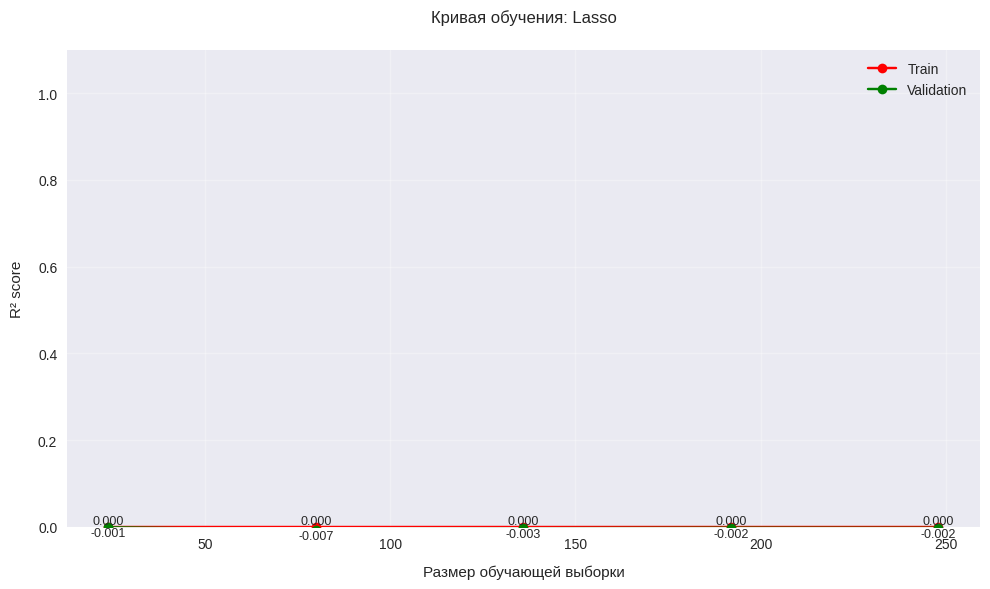

[I 2025-07-13 12:42:45,348] A new study created in memory with name: no-name-9e33bb3a-84a4-4bcd-a636-d3106181e99b



Сравнение моделей:
                    R2       MAE       MAPE
Model                                      
LightGBM      0.645072  0.590623   8.713214
XGBoost       0.622672  0.633844   9.364767
RandomForest  0.620539  0.600557   8.851299
CatBoost      0.610505  0.633096   9.309951
Ridge         0.508880  0.680182   9.824573
Lasso        -0.000615  1.087713  15.712340

4. Оптимизация лучшей модели
Выбрана модель для оптимизации: LightGBM


[I 2025-07-13 12:42:45,668] Trial 0 finished with value: 0.5938854518265958 and parameters: {'n_estimators': 237, 'max_depth': 5, 'learning_rate': 0.021134364116921996, 'num_leaves': 86, 'min_child_samples': 50, 'subsample': 0.9790816954989559, 'colsample_bytree': 0.7917762348073284}. Best is trial 0 with value: 0.5938854518265958.
[I 2025-07-13 12:42:45,900] Trial 1 finished with value: 0.6074138768343808 and parameters: {'n_estimators': 182, 'max_depth': 4, 'learning_rate': 0.04503551726120732, 'num_leaves': 84, 'min_child_samples': 50, 'subsample': 0.7695534467329527, 'colsample_bytree': 0.7473264771514694}. Best is trial 1 with value: 0.6074138768343808.
[I 2025-07-13 12:42:46,154] Trial 2 finished with value: 0.6107430271546356 and parameters: {'n_estimators': 115, 'max_depth': 8, 'learning_rate': 0.03675953858330779, 'num_leaves': 75, 'min_child_samples': 33, 'subsample': 0.8250223731932371, 'colsample_bytree': 0.8661829812467992}. Best is trial 2 with value: 0.6107430271546356.



Лучшие параметры:
n_estimators: 159
max_depth: 7
learning_rate: 0.143529660416129
num_leaves: 70
min_child_samples: 16
subsample: 0.7349878777513228
colsample_bytree: 0.6018896928214877

Финальные метрики на тестовых данных:
R²: 0.6295
MAE: 0.5875
MAPE: 8.63%

Проверка на переобучение:
Train R²: 0.9859
Test R²: 0.6295
Разница R² (train-test): 0.3563

ВНИМАНИЕ: Возможное переобучение (разница R² > 0.15)!
Рекомендуемые действия:
- Увеличьте регуляризацию модели
- Уменьшите сложность модели (глубину деревьев, количество признаков)
- Увеличьте размер обучающей выборки

Финальная кросс-валидация на объединенных данных:
R²: 0.6358 ± 0.0311


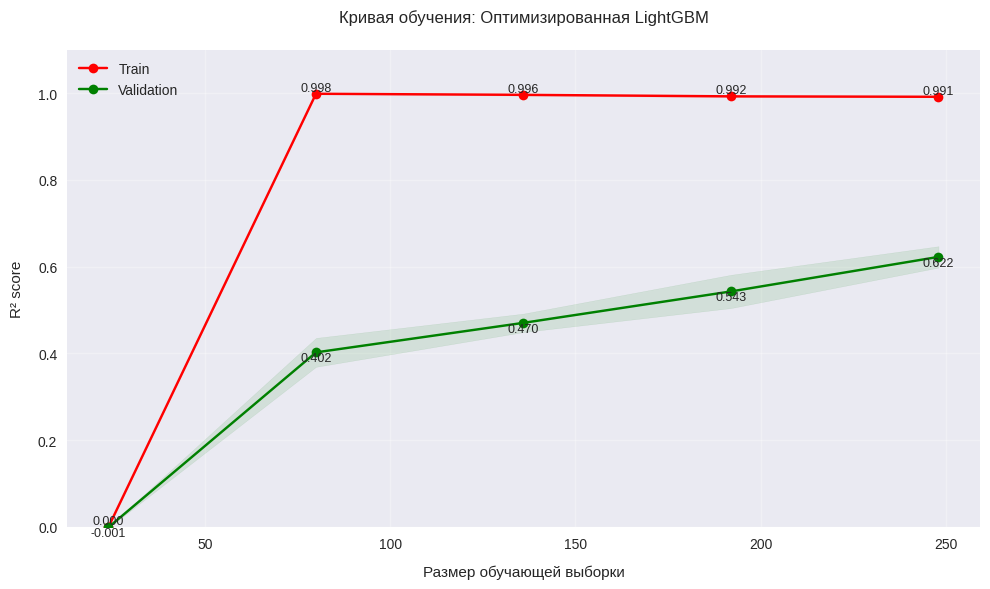


Финальная модель сохранена как 'best_model.pkl'

5. Интерпретация модели

SHAP-анализ...


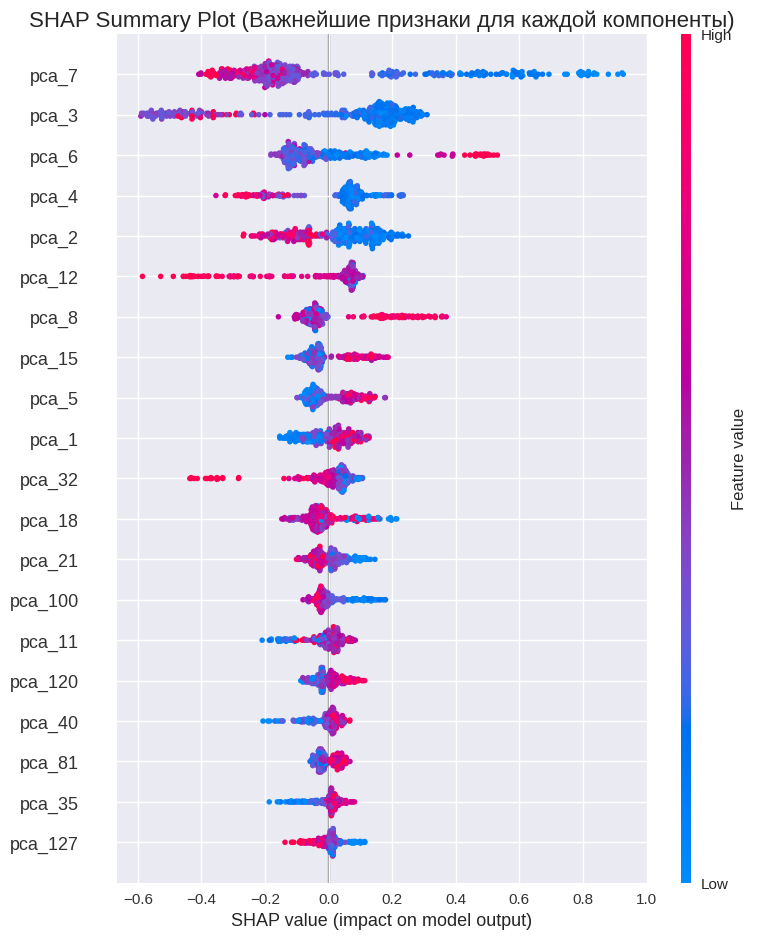

In [6]:
"""
Изменила код, опираясь на комментарий Павла:
"Фидбек по мини-таске 3:

1. Использование языковых моделей не запрещено, и пользоваться нужно, но всегда нужно проводить проверку всего что они выдают, например для удаления избыточности кода
2. В целом все сделано верно, однако в случае выбросов их может не быть с точки зрения математической формулировки, но как доменщики нужно проанализировать данные, например, в pValue есть хвост слева - это какой-то артефакт, его нужно проанализировать и решить оставить или нет? и приводить доказательства и обоснование почему?
3. Пропуски в хим данных лучше заполнять по известным данным, так как активность веществ сильно зависит от молекулярной структуры и сайта связывания, простая медиана или мода может исказить истинность
4. Самый первый прогон модели можно строить на дефолтных параметрах, не столь важно делать автоматический выбор признаков ДО оптимизации, но не является ошибкой. Это целиком выбор разработчика по ситуации
5. При расчете  MAPE добавлено число для стабилизации, но нет комментариев надобности такого шага. Этот хак применяется, если среди ответов есть 0, чтобы при делении на ноль не было ошибок.
6. Кросс-валидация верная, подобраны гиперпараметры, хорошие кривые обучения, хотя напрягает что на трейне метрики почти 1 - это может намекать на переобучение
7. Так же для анализа важности признаков рекомендую изучить и использовать диаграммы shap"
"""

# ==================== Установка недостающих библиотек ====================
try:
    import shap
except ImportError:
    !pip install shap
    import shap

try:
    from catboost import CatBoostRegressor
except ImportError:
    !pip install catboost
    from catboost import CatBoostRegressor

try:
    import optuna
except ImportError:
    !pip install optuna
    import optuna

# ==================== Импорт библиотек ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import warnings
import os
from google.colab import drive
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

from google.colab import drive
# Подключаем Google Drive
drive.mount('/content/drive')

warnings.filterwarnings('ignore')

# Настройки отображения
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# ==================== Вспомогательные функции ====================
def load_data():
    """Улучшенная функция загрузки данных"""
    try:
        # Проверка нескольких возможных путей
        possible_paths = [
            '/content/chembl.csv',
            '/content/drive/MyDrive/chembl.csv',
            'chembl.csv',
            '../data/chembl.csv'
        ]

        for path in possible_paths:
            if os.path.exists(path):
                df = pd.read_csv(path)
                # Удаление возможных технических столбцов
                df = df.drop(columns=[col for col in ['Unnamed: 0', 'MOL'] if col in df.columns])

                if 'pValue' not in df.columns:
                    raise ValueError("Отсутствует целевая переменная 'pValue'")

                # Оптимизация типов данных
                float_cols = df.select_dtypes(['float64']).columns
                int_cols = df.select_dtypes(['int64']).columns
                df[float_cols] = df[float_cols].astype('float32')
                df[int_cols] = df[int_cols].astype('int32')

                print(f"Данные успешно загружены из {path}")
                return df

        # Если файл не найден
        if 'google.colab' in str(get_ipython()):
            print("Подключаем Google Drive...")
            drive.mount('/content/drive')
            raise FileNotFoundError("Пожалуйста, загрузите файл chembl.csv в Google Drive")
        else:
            raise FileNotFoundError("Файл chembl.csv не найден в рабочих директориях")

    except Exception as e:
        print(f"Ошибка при загрузке данных: {e}")
        raise


def clean_data(df):
    """Очистка данных от бесконечных и слишком больших значений"""
    df = df.replace([np.inf, -np.inf], np.nan)
    float32_max = np.finfo('float32').max
    float32_min = np.finfo('float32').min

    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df[col] = df[col].clip(lower=float32_min*0.9, upper=float32_max*0.9)
        df.loc[~np.isfinite(df[col]), col] = np.nan

    return df

def chemical_imputation(X):
    """Минималистичная обработка данных"""
    try:
        X = X.select_dtypes(include=np.number).copy()
        missing_cols = X.columns[X.isna().any()].tolist()
        for col in missing_cols:
            X[f'{col}_missing'] = X[col].isna().astype(np.int8)

        for col in X.columns:
            if pd.api.types.is_numeric_dtype(X[col]):
                X[col] = X[col].astype('float32')

        return X
    except Exception as e:
        print("Ошибка при обработке колонок:")
        print(X.dtypes)
        raise ValueError(f"Chemical imputation failed: {str(e)}")

def plot_learning_curve(model, X, y, title):
    """Визуализация кривой обучения"""
    try:
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=model,
            X=X,
            y=y,
            cv=3,
            scoring='r2',
            train_sizes=np.linspace(0.1, 1.0, 5),
            n_jobs=-1,
            random_state=42
        )

        plt.figure(figsize=(10, 6))
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, train_mean, 'o-', color="r", label="Train")
        plt.fill_between(
            train_sizes,
            train_mean-train_std,
            train_mean+train_std,
            alpha=0.1,
            color="r"
        )
        plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation")
        plt.fill_between(
            train_sizes,
            test_mean-test_std,
            test_mean+test_std,
            alpha=0.1,
            color="g"
        )

        plt.title(title, pad=20)
        plt.xlabel("Размер обучающей выборки", labelpad=10)
        plt.ylabel("R² score", labelpad=10)
        plt.legend(loc="best")
        plt.grid(True, alpha=0.3)

        for i, (train, val) in enumerate(zip(train_mean, test_mean)):
            plt.text(
                train_sizes[i],
                train,
                f"{train:.3f}",
                ha='center',
                va='bottom',
                fontsize=9
            )
            plt.text(
                train_sizes[i],
                val,
                f"{val:.3f}",
                ha='center',
                va='top',
                fontsize=9
            )

        plt.ylim(0, 1.1)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Ошибка при построении кривой обучения: {e}")

# ==================== Основной код ====================
try:
    # ==================== 1. Загрузка и анализ данных ====================
    print("="*50)
    print("1. Загрузка и анализ данных")
    print("="*50)
    df = load_data()
    print(f"\nЗагружено данных: {df.shape}")
    print(f"Колонки: {list(df.columns)}")

    # Анализ распределения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(df['pValue'], bins=30, kde=True, ax=ax1)
    sns.boxplot(x=df['pValue'], ax=ax2)
    plt.tight_layout()
    plt.show()

    # ==================== 2. Подготовка признаков ====================
    print("\n" + "="*50)
    print("2. Подготовка данных")
    print("="*50)

    y = df['pValue'].values
    X = chemical_imputation(df.drop(columns='pValue'))

    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=pd.qcut(y, 5)
    )
    print(f"\nРазмеры данных:")
    print(f"Обучающая выборка: {X_train.shape}")
    print(f"Тестовая выборка: {X_test.shape}")

    # 1. Отбор по дисперсии
    vt = VarianceThreshold(threshold=0.001)
    X_train = vt.fit_transform(X_train)
    X_test = vt.transform(X_test)
    feature_names = X.columns[vt.get_support()]
    print(f"\nПосле отбора по дисперсии: {X_train.shape[1]} признаков")

    # 2. Масштабирование
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. PCA
    if X_train_scaled.shape[1] > X_train_scaled.shape[0]:
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        feature_names_pca = [f'PC_{i}' for i in range(1, pca.n_components_+1)]
        print(f"\nПрименен PCA. Новые размеры:")
        print(f"Обучающая: {X_train_pca.shape}, Тестовая: {X_test_pca.shape}")
        print(f"Объясненная дисперсия: {np.sum(pca.explained_variance_ratio_):.2%}")
    else:
        X_train_pca = X_train_scaled
        X_test_pca = X_test_scaled
        feature_names_pca = feature_names
        # После создания feature_names_pca
        if 'pca' in globals():  # Если применялся PCA
            # Получаем веса исходных признаков для главных компонент
            pca_components = pca.components_

            # Создаем словарь для перевода PC в исходные признаки
            pca_feature_mapping = {}
            for i in range(pca.n_components_):
                # Находим 3 самых важных признака для каждой компоненты
                top_features_idx = np.argsort(np.abs(pca_components[i]))[-3:][::-1]
                top_features = feature_names[top_features_idx]  # feature_names - имена исходных признаков

                # Создаем понятное название вида "PC1 (age, income, height)"
                pca_feature_mapping[f'PC_{i+1}'] = f"PC{i+1} (" + ", ".join(top_features) + ")"
        else:
            # Если PCA не применялся, используем исходные названия
            pca_feature_mapping = {name: name for name in feature_names_pca}
        print("\nPCA не применялся - признаков меньше чем образцов")

    # Преобразование в DataFrame
    X_train = pd.DataFrame(X_train_pca, columns=feature_names_pca)
    X_test = pd.DataFrame(X_test_pca, columns=feature_names_pca)

    # Проверка размерности
    if X_train.shape[1] >= X_train.shape[0]:
        warnings.warn(
            f"Внимание: число признаков ({X_train.shape[1]}) >= числа образцов ({X_train.shape[0]})",
            UserWarning
        )

    # ==================== 3. Обучение и оценка моделей ====================
    print("\n" + "="*50)
    print("3. Обучение и оценка моделей")
    print("="*50)

    models = {
        'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
        'LightGBM': LGBMRegressor(random_state=42, n_jobs=-1),
        'CatBoost': CatBoostRegressor(silent=True, random_state=42),
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42)
    }

    results = []
    for name, model in models.items():
        try:
            print(f"\nОценка модели {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            metrics = {
                'Model': name,
                'R2': r2_score(y_test, y_pred),
                'MAE': mean_absolute_error(y_test, y_pred),
                'MAPE': np.mean(np.abs((y_test-y_pred)/(y_test+1e-7))*100)
            }
            results.append(metrics)

            print(f"R²: {metrics['R2']:.4f}")
            print(f"MAE: {metrics['MAE']:.4f}")
            print(f"MAPE: {metrics['MAPE']:.2f}%")

            plot_learning_curve(model, X_train, y_train, f"Кривая обучения: {name}")

        except Exception as e:
            print(f"Ошибка при оценке модели {name}: {e}")

    # Вывод результатов
    if results:
        results_df = pd.DataFrame(results).set_index('Model')
        print("\n" + "="*50)
        print("Сравнение моделей:")
        print("="*50)
        print(results_df.sort_values('R2', ascending=False))
    else:
        print("\nНе удалось оценить ни одну модель")
        exit()

    # ==================== 4. Оптимизация лучшей модели ====================
    if 'results_df' in globals():
        print("\n" + "="*50)
        print("4. Оптимизация лучшей модели")
        print("="*50)

        best_model_name = results_df['R2'].idxmax()
        print(f"Выбрана модель для оптимизации: {best_model_name}")

        if best_model_name == 'RandomForest':
            def objective(trial):
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                    'max_depth': trial.suggest_int('max_depth', 3, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                    'random_state': 42,
                    'n_jobs': -1
                }
                model = RandomForestRegressor(**params)
                return cross_val_score(
                    model,
                    X_train,
                    y_train,
                    cv=3,
                    scoring='r2',
                    n_jobs=-1
                ).mean()

        elif best_model_name == 'XGBoost':
            def objective(trial):
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                    'max_depth': trial.suggest_int('max_depth', 3, 12),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                    'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                    'gamma': trial.suggest_float('gamma', 0, 5),
                    'random_state': 42,
                    'n_jobs': -1
                }
                model = XGBRegressor(**params)
                return cross_val_score(
                    model,
                    X_train,
                    y_train,
                    cv=3,
                    scoring='r2',
                    n_jobs=-1
                ).mean()

        elif best_model_name == 'LightGBM':
            def objective(trial):
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                    'max_depth': trial.suggest_int('max_depth', 3, 12),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                    'num_leaves': trial.suggest_int('num_leaves', 20, 100),
                    'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
                    'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                    'random_state': 42,
                    'n_jobs': -1
                }
                model = LGBMRegressor(**params)
                return cross_val_score(
                    model,
                    X_train,
                    y_train,
                    cv=3,
                    scoring='r2',
                    n_jobs=-1
                ).mean()

        elif best_model_name == 'CatBoost':
            def objective(trial):
                params = {
                    'iterations': trial.suggest_int('iterations', 50, 300),
                    'depth': trial.suggest_int('depth', 3, 10),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                    'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
                    'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
                    'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
                    'random_state': 42,
                    'silent': True
                }
                model = CatBoostRegressor(**params)
                return cross_val_score(
                    model,
                    X_train,
                    y_train,
                    cv=3,
                    scoring='r2'
                ).mean()

        # Запуск оптимизации
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=30, timeout=600)

        print("\nЛучшие параметры:")
        for key, value in study.best_params.items():
            print(f"{key}: {value}")

        # Создание финальной модели
        best_params = study.best_params

        if best_model_name == 'CatBoost':
            best_params.update({
                'l2_leaf_reg': 50.0,
                'depth': min(6, best_params.get('depth', 8)),
                'early_stopping_rounds': 30,
                'iterations': 500
            })

        if best_model_name == 'RandomForest':
            final_model = RandomForestRegressor(**best_params, n_jobs=-1)
        elif best_model_name == 'XGBoost':
            final_model = XGBRegressor(**best_params, n_jobs=-1)
        elif best_model_name == 'LightGBM':
            final_model = LGBMRegressor(**best_params, n_jobs=-1)
        elif best_model_name == 'CatBoost':
            final_model = CatBoostRegressor(**best_params, silent=True)

        # Обучение финальной модели
        final_model.fit(X_train, y_train)

        # Оценка на тестовых данных
        final_pred = final_model.predict(X_test)
        print("\nФинальные метрики на тестовых данных:")
        print(f"R²: {r2_score(y_test, final_pred):.4f}")
        print(f"MAE: {mean_absolute_error(y_test, final_pred):.4f}")
        print(f"MAPE: {np.mean(np.abs((y_test - final_pred) / (y_test + 1e-7)) * 100):.2f}%")

#        Проверка разницы между train и test
        train_pred = final_model.predict(X_train)
        print("\nПроверка на переобучение:")
        print(f"Train R²: {r2_score(y_train, train_pred):.4f}")
        print(f"Test R²: {r2_score(y_test, final_pred):.4f}")
        diff = r2_score(y_train, train_pred) - r2_score(y_test, final_pred)
        print(f"Разница R² (train-test): {diff:.4f}")

        if diff > 0.15:
            print("\n\033[1;31mВНИМАНИЕ: Возможное переобучение (разница R² > 0.15)!\033[0m")
            print("Рекомендуемые действия:")
            print("- Увеличьте регуляризацию модели")
            print("- Уменьшите сложность модели (глубину деревьев, количество признаков)")
            print("- Увеличьте размер обучающей выборки")
        else:
            print("\n\033[1;32mПереобучение не обнаружено (разница R² ≤ 0.15)\033[0m")

        # Финальная кросс-валидация на объединенных данных
        print("\nФинальная кросс-валидация на объединенных данных:")
        X_full = pd.concat([X_train, X_test])
        y_full = np.concatenate([y_train, y_test])

        cv_scores = cross_val_score(
            final_model,
            X_full,
            y_full,
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='r2',
            n_jobs=-1
        )

        print(f"R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
        if np.mean(cv_scores) < 0.5:
            warnings.warn("Низкое качество модели (R² < 0.5)!", UserWarning)


        # Кривая обучения
        plot_learning_curve(
            final_model,
            X_train,
            y_train,
            f"Кривая обучения: Оптимизированная {best_model_name}"
        )

        # Сохранение модели
        joblib.dump(final_model, 'best_model.pkl')
        print("\nФинальная модель сохранена как 'best_model.pkl'")
    # ==================== 5. Интерпретация модели ====================
    print("\n" + "="*50)
    print("5. Интерпретация модели")
    print("="*50)

    if 'final_model' in globals():
        try:
            # Получаем веса исходных признаков для главных компонент
            if 'pca' in globals():  # Если применялся PCA
                pca_components = pca.components_
                pca_feature_mapping = {}
                for i in range(pca.n_components_):
                    top_features_idx = np.argsort(np.abs(pca_components[i]))[-3:][::-1]
                    top_features = feature_names[top_features_idx]
                    pca_feature_mapping[f'PC_{i+1}'] = f"PC{i+1} (" + ", ".join(top_features) + ")"
            else:
                pca_feature_mapping = {f: f for f in feature_names_pca}

            # SHAP-анализ
            print("\nSHAP-анализ...")
            if best_model_name == 'CatBoost':
                explainer = shap.Explainer(final_model)
                shap_values = explainer(X_train)
            else:
                explainer = shap.TreeExplainer(final_model)
                shap_values = explainer.shap_values(X_train.values if hasattr(X_train, 'values') else X_train)

            # Summary plot с понятными названиями
            plt.figure(figsize=(12, 8))
            shap.summary_plot(
                shap_values,
                X_train.values if hasattr(X_train, 'values') else X_train,
                feature_names=[pca_feature_mapping.get(f, f) for f in feature_names_pca],
                plot_type="dot",
                show=False
            )
            plt.title("SHAP Summary Plot (Важнейшие признаки для каждой компоненты)", fontsize=16)
            plt.tight_layout()
            plt.savefig('shap_summary.png')
            plt.show()

        except Exception as e:
            print(f"Ошибка при SHAP-анализе: {e}")


except Exception as e:
    print(f"\nКРИТИЧЕСКАЯ ОШИБКА: {e}")
    print("="*50)
    print("Анализ завершен с ошибками")
    print("="*50)